In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torchvision.models import alexnet
import matplotlib.pyplot as plt
import multiprocessing
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
from torchvision.models import alexnet


In [2]:
# defining hyperparameters
num_epochs = 10
batch_size = 64
learning_rate = 0.01
accuracy_list = []
loss_list = []

In [3]:
#loading data
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

classes = ['airplane', 'automobile']

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter the dataset to include only the specified classes
train_indices = [i for i, (_, label) in enumerate(train_dataset) if train_dataset.classes[label] in classes]
test_indices = [i for i, (_, label) in enumerate(test_dataset) if test_dataset.classes[label] in classes]

train_dataset = torch.utils.data.Subset(train_dataset, train_indices)
test_dataset = torch.utils.data.Subset(test_dataset, test_indices)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
#using alex net for classification and using pre trained and classify by using 2 for output 
model = alexnet(pretrained = True)

num_classes = 2
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, num_classes)

model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        
    accuracy = 100.0 * correct / total
    epoch_loss = running_loss / len(train_loader)
    accuracy_list.append(accuracy)
    loss_list.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

c:\users\green.pc\appdata\local\programs\python\python37\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\users\green.pc\appdata\local\programs\python\python37\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Loss: 0.2620, Accuracy: 89.55%
Epoch [2/10], Loss: 0.0775, Accuracy: 96.97%
Epoch [3/10], Loss: 0.0538, Accuracy: 97.89%
Epoch [4/10], Loss: 0.0364, Accuracy: 98.79%
Epoch [5/10], Loss: 0.0322, Accuracy: 98.77%
Epoch [6/10], Loss: 0.0210, Accuracy: 99.25%
Epoch [7/10], Loss: 0.0156, Accuracy: 99.47%
Epoch [8/10], Loss: 0.0130, Accuracy: 99.55%
Epoch [9/10], Loss: 0.0119, Accuracy: 99.62%
Epoch [10/10], Loss: 0.0253, Accuracy: 99.29%


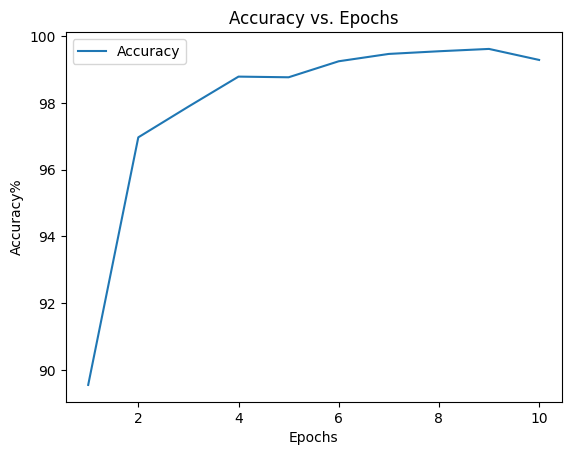

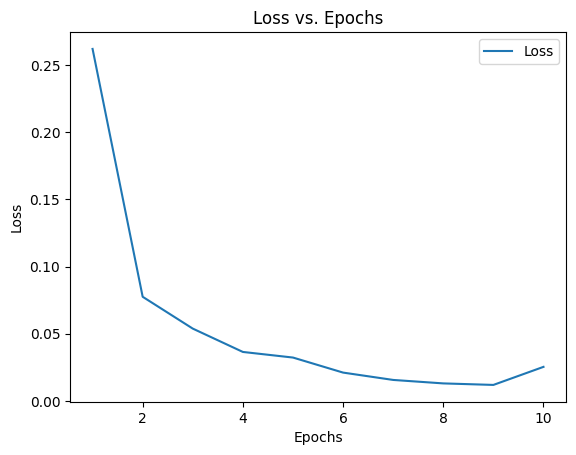

In [8]:
#for plotting what ever you want and you see the output as soon as posible, i define accuracy and loss from previous cell in matrix
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = [89.55, 96.97, 97.89, 98.79, 98.77, 99.25, 99.47, 99.55, 99.62, 99.29]
epoch_loss = [0.2620, 0.0775, 0.0538, 0.0364, 0.0327, 0.0210, 0.0156, 0.0130, 0.0119, 0.0253]
plt.plot(epochs, accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy%')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

plt.plot(epochs, loss_list, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [9]:
# Test the model
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:

        outputs = model(images)
        _, predicted = outputs.max(1)
        test_total += labels.size(0)
        test_correct += predicted.eq(labels).sum().item()

test_accuracy = 100.0 * test_correct / test_total
print(f"Accuracy on the test data: {test_accuracy:.2f}%")

Accuracy on the test data: 98.20%


Files already downloaded and verified


c:\users\green.pc\appdata\local\programs\python\python37\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\users\green.pc\appdata\local\programs\python\python37\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Loss feature extraction: 104.1108, Accuracy feature extraction: 0.23%
Epoch [2/10], Loss feature extraction: 108.6021, Accuracy feature extraction: 0.05%
Epoch [3/10], Loss feature extraction: 111.4221, Accuracy feature extraction: 0.02%
Epoch [4/10], Loss feature extraction: 114.5194, Accuracy feature extraction: 0.06%
Epoch [5/10], Loss feature extraction: 113.9090, Accuracy feature extraction: 0.08%
Epoch [6/10], Loss feature extraction: 113.3677, Accuracy feature extraction: 0.03%
Epoch [7/10], Loss feature extraction: 113.3668, Accuracy feature extraction: 0.29%
Epoch [8/10], Loss feature extraction: 115.8932, Accuracy feature extraction: 0.13%
Epoch [9/10], Loss feature extraction: 112.6151, Accuracy feature extraction: 0.07%
Epoch [10/10], Loss feature extraction: 112.0176, Accuracy feature extraction: 0.03%


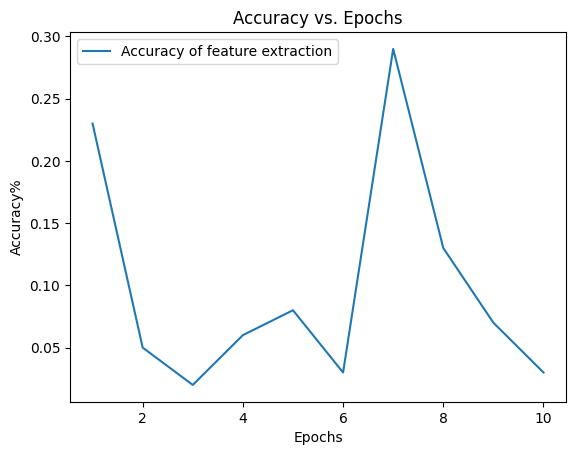

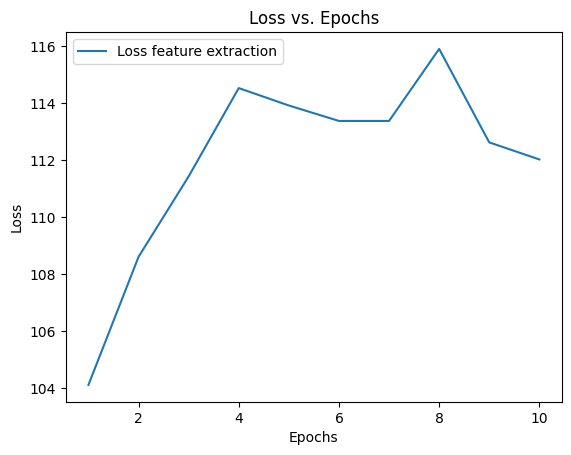

In [4]:
# Defining the hyperparameters
margin = 1.0
loss_list_feature_extraction = []
accuracy_list_feature_extraction = []

loss_list_fully_connected = []
accuracy_fully_connected = []

# defining a class for changing dataset
class CIFAR10Subset(Dataset):
    def __init__(self, dataset, classes, transform=None):
        self.dataset = dataset
        self.classes = classes
        self.transform = transform
        self.indices = self._get_subset_indices()

    def _get_subset_indices(self):
        indices = []
        for i in range(len(self.dataset.targets)):
            if self.dataset.targets[i] in self.classes:
                indices.append(i)
        return indices

    def __getitem__(self, idx):
        image, target = self.dataset[self.indices[idx]]
        
        if isinstance(image, torch.Tensor):
            image = transforms.ToPILImage()(image)

        if self.transform:
            image = self.transform(image)

        return image, target
        
    def __len__(self):
        return len(self.indices)


# Defining the TripletLoss
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = torch.norm(anchor - positive, p=2, dim=1)
        distance_negative = torch.norm(anchor - negative, p=2, dim=1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cifar_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
class_names = cifar_dataset.classes

train_dataset = CIFAR10Subset(cifar_dataset, classes=[0, 1], transform=transform)
test_dataset = CIFAR10Subset(cifar_dataset, classes=[0, 1], transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Loading the pre-trained AlexNet model
pretrained_model = alexnet(pretrained=True)
pretrained_model.to(device)

# Freezing all the layers except the last fully connected layer
for param in pretrained_model.parameters():
    param.requires_grad = False
pretrained_model.classifier[6].weight.requires_grad = True
pretrained_model.classifier[6].bias.requires_grad = True

# Defining the triplet loss function
triplet_loss = TripletLoss(margin=margin)
triplet_loss.to(device)

optimizer = optim.Adam(pretrained_model.classifier[6].parameters(), lr=learning_rate)

# Training the feature extractor
for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = pretrained_model(images)

        anchor_indices = torch.where(labels == 0)[0]
        positive_indices = torch.where(labels == 1)[0]
        negative_indices = torch.where(labels == 0)[0]

        # Ensuring equal number of anchor, positive, and negative images
        min_length = min(len(anchor_indices), len(positive_indices), len(negative_indices))
        anchor_indices = anchor_indices[:min_length]
        positive_indices = positive_indices[:min_length]
        negative_indices = negative_indices[:min_length]

        anchor_images = outputs[anchor_indices]
        positive_images = outputs[positive_indices]
        negative_images = outputs[negative_indices]

        loss = triplet_loss(anchor_images, positive_images, negative_images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100.0 * train_correct / train_total
    train_loss /= len(train_loader)

    accuracy_list_feature_extraction.append(train_accuracy)
    loss_list_feature_extraction.append(train_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss feature extraction: {train_loss:.4f}, Accuracy feature extraction: {train_accuracy:.2f}%")

num_epochs_feature = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(num_epochs_feature, accuracy_list_feature_extraction, label='Accuracy of feature extraction')
plt.xlabel('Epochs')
plt.ylabel('Accuracy%')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

plt.plot(num_epochs_feature, loss_list_feature_extraction, label='Loss feature extraction')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()   

criterion = nn.CrossEntropyLoss()

# Defining the optimizer for the fully connected layer
optimizer_fc = optim.Adam(pretrained_model.classifier[6].parameters(), lr=learning_rate)



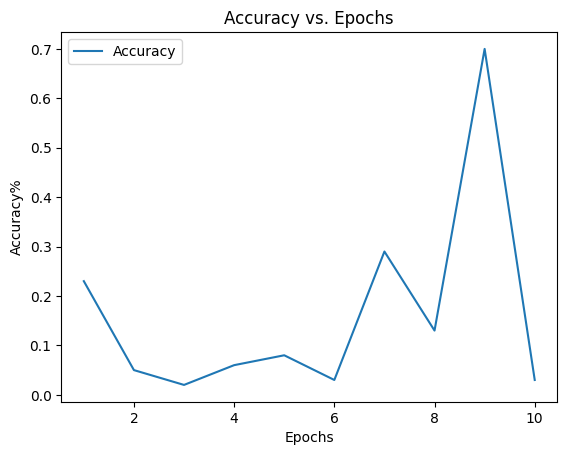

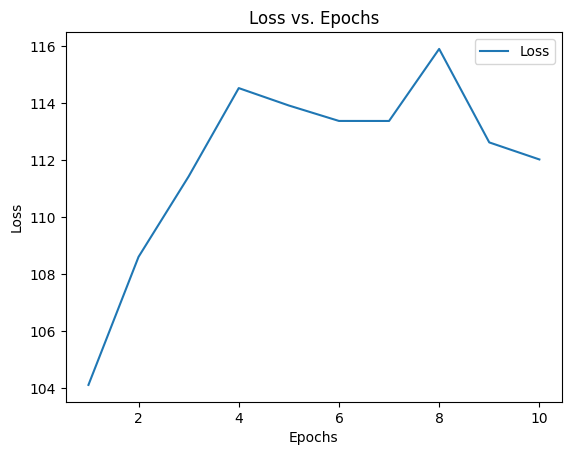

In [6]:
# if you run previous cell, plase comment accuracy list and loss list below
#for plotting what ever you want and you see the output as soon as posible, i define accuracy and loss from previous cell in matrix
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = [0.23, 0.05, 0.02, 0.06, 0.08, 0.03, 0.29, 0.13, 0.7, 0.03]
loss_list = [104.1108, 108.6021, 111.4221, 114.5194, 113.9090, 113.3677, 113.3668, 115.8932, 112.6151, 112.0176]
plt.plot(epochs, accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy%')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

plt.plot(epochs, loss_list, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

Epoch [1/10], Loss fully connected: 0.8435, Accuracy fully connected: 85.31%
Epoch [2/10], Loss fully connected: 0.7317, Accuracy fully connected: 88.08%
Epoch [3/10], Loss fully connected: 0.7987, Accuracy fully connected: 88.35%
Epoch [4/10], Loss fully connected: 0.9541, Accuracy fully connected: 88.57%
Epoch [5/10], Loss fully connected: 0.8958, Accuracy fully connected: 89.06%
Epoch [6/10], Loss fully connected: 1.0124, Accuracy fully connected: 88.96%
Epoch [7/10], Loss fully connected: 0.9928, Accuracy fully connected: 88.75%
Epoch [8/10], Loss fully connected: 1.1276, Accuracy fully connected: 88.80%
Epoch [9/10], Loss fully connected: 0.9074, Accuracy fully connected: 89.48%
Epoch [10/10], Loss fully connected: 0.9936, Accuracy fully connected: 89.57%


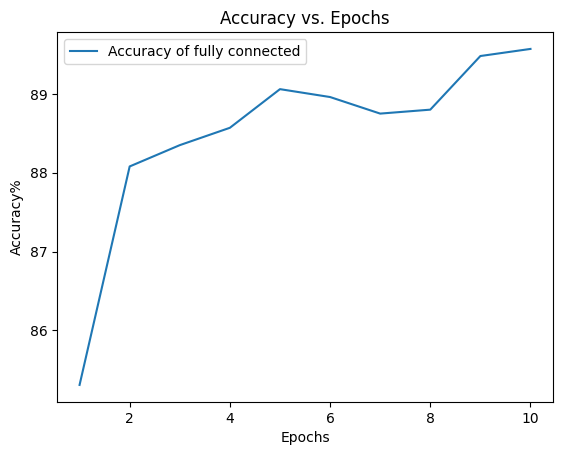

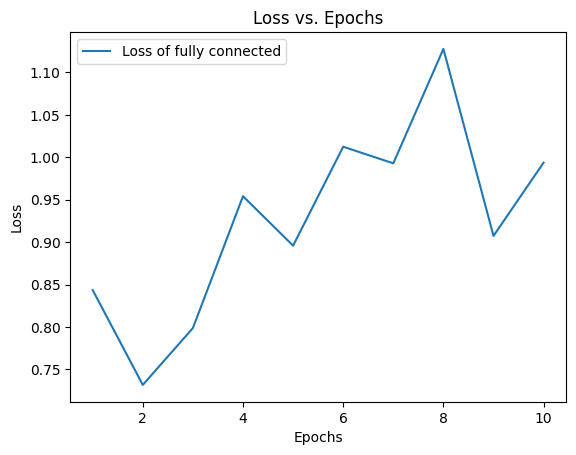

In [7]:
# Training the fully connected layer
for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = pretrained_model(images)

        loss = criterion(outputs, labels)

        optimizer_fc.zero_grad()
        loss.backward()
        optimizer_fc.step()

        train_loss += loss.item()
        train_total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100.0 * train_correct / train_total
    train_loss /= len(train_loader)

    accuracy_fully_connected.append(train_accuracy)
    loss_list_fully_connected.append(train_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss fully connected: {train_loss:.4f}, Accuracy fully connected: {train_accuracy:.2f}%")


num_epochs_fully = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(num_epochs_fully, accuracy_fully_connected, label='Accuracy of fully connected')
plt.xlabel('Epochs')
plt.ylabel('Accuracy%')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

plt.plot(num_epochs_fully, loss_list_fully_connected, label='Loss of fully connected')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

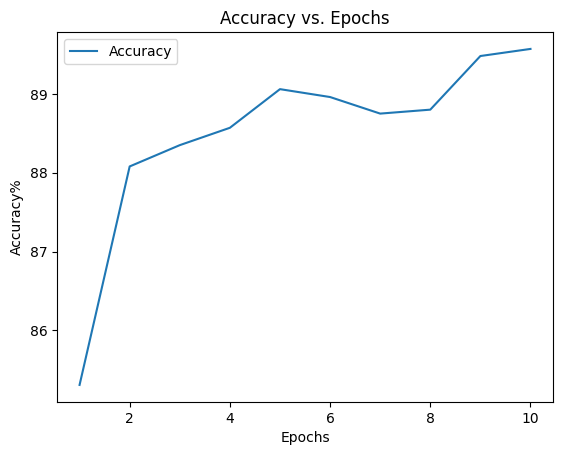

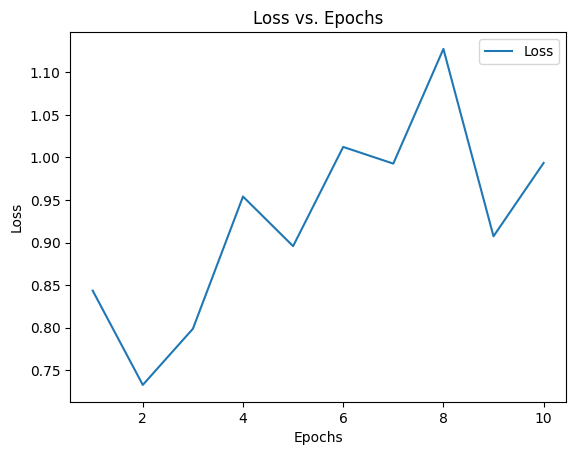

In [8]:
# if you run previous cell, plase comment accuracy list and loss list below
#for plotting what ever you want and you see the output as soon as posible, i define accuracy and loss from previous cell in matrix
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = [85.31, 88.08, 88.35, 88.57, 89.06, 88.96, 88.75, 88.80, 89.48, 89.57]
loss_list = [0.8435, 0.7327, 0.7987, 0.9541, 0.8958, 1.0124, 0.9928, 1.1276, 0.9074, 0.9936]
plt.plot(epochs, accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy%')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

plt.plot(epochs, loss_list, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [9]:
# Testing the model
pretrained_model.eval()
test_total = 0
test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = pretrained_model(images)
        _, predicted = torch.max(outputs.data, 1)

        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100.0 * test_correct / test_total
print("Test Accuracy: {:.2f}%".format(test_accuracy))

Test Accuracy: 92.85%


In [3]:
#loading data
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

classes = ['airplane', 'automobile']

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter the dataset to include only the specified classes
train_indices = [i for i, (_, label) in enumerate(train_dataset) if train_dataset.classes[label] in classes]
test_indices = [i for i, (_, label) in enumerate(test_dataset) if test_dataset.classes[label] in classes]

train_dataset = torch.utils.data.Subset(train_dataset, train_indices)
test_dataset = torch.utils.data.Subset(test_dataset, test_indices)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
#Defining Model
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

model = AlexNet()

# Defining loss functions
triplet_loss_fn = nn.TripletMarginLoss()
cross_entropy_loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Training loop
accuracy_list = []
loss_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        
        cross_entropy_loss = cross_entropy_loss_fn(outputs, labels)
        
        anchor_indices = torch.where(labels == 0)[0]
        positive_indices = torch.where(labels == 1)[0]
        negative_indices = torch.where(labels == 0)[0]

        min_length = min(len(anchor_indices), len(positive_indices), len(negative_indices))
        anchor_indices = anchor_indices[:min_length]
        positive_indices = positive_indices[:min_length]
        negative_indices = negative_indices[:min_length]

        anchor_images = outputs[anchor_indices]
        positive_images = outputs[positive_indices]
        negative_images = outputs[negative_indices]

        # Compute triplet loss
        triplet = triplet_loss_fn(anchor_images, positive_images, negative_images)
        loss = triplet + cross_entropy_loss
        
        loss.backward()
        optimizer.step()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        running_loss += loss.item()

    epoch_accuracy = 100 * correct / total
    epoch_loss = running_loss / len(train_loader)

    accuracy_list.append(epoch_accuracy)
    loss_list.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {epoch_accuracy:.2f}%, Loss: {epoch_loss:.4f}")


Epoch [11/10], Accuracy: 49.76%, Loss: 2.0469
Epoch [11/10], Accuracy: 49.82%, Loss: 1.7370
Epoch [11/10], Accuracy: 50.46%, Loss: 1.7099
Epoch [11/10], Accuracy: 50.08%, Loss: 1.6997
Epoch [11/10], Accuracy: 49.80%, Loss: 1.6981
Epoch [11/10], Accuracy: 50.16%, Loss: 1.6982
Epoch [11/10], Accuracy: 49.90%, Loss: 1.6964
Epoch [11/10], Accuracy: 49.54%, Loss: 1.6968
Epoch [11/10], Accuracy: 50.62%, Loss: 1.6952
Epoch [11/10], Accuracy: 50.28%, Loss: 1.6957


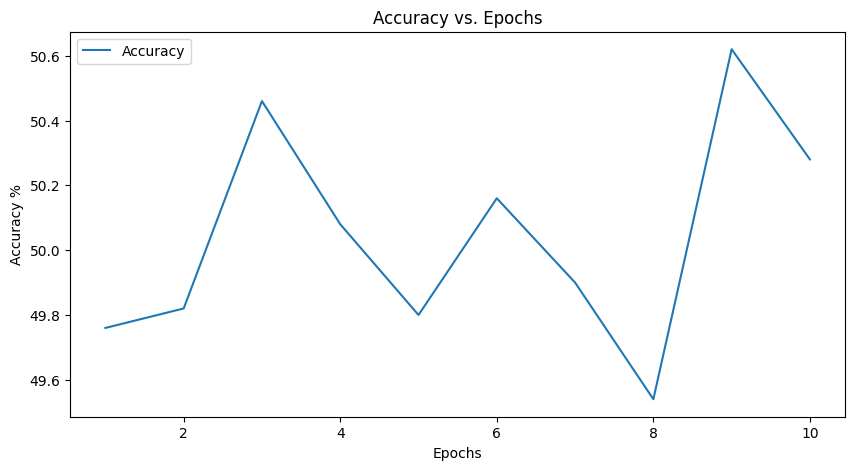

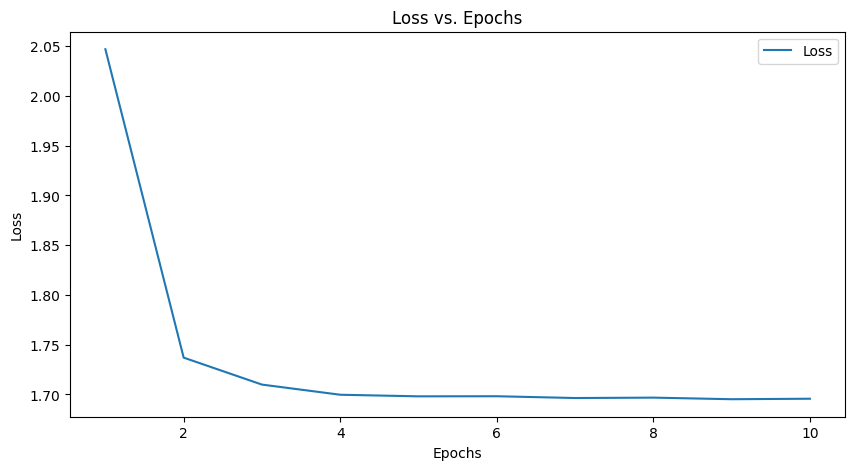

In [8]:
# if you run previous cell, plase comment accuracy list and loss list below
#for plotting what ever you want and you see the output as soon as posible, i define accuracy and loss from previous cell in matrix
accuracy_list = [49.76, 49.82, 50.46, 50.08, 49.80, 50.16, 49.90, 49.54, 50.62, 50.28]
loss_list = [2.0469, 1.7370, 1.7099, 1.6997, 1.6981, 1.6982, 1.6964, 1.6968, 1.6952, 1.6957]
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_list, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()


In [10]:
# Test the model on the test data
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Accuracy on the test data: {test_accuracy:.2f}%")

Accuracy on the test data: 50.00%
